# Lab 5

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-5](https://yuanyuyuan.github.io/itcm/lab-5.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 12/11(Wed.)**

In [1]:
name = "蔡子暘"
student_id = "B07201025"

---

# Exercise 1
---
### An $m \times m$ _Hilbert matrix_ $H_m$ has entries $h_{ij} = 1/(i+j-1)$ for $ 1 \leq i, j \leq m$, and so it has the form
### $$\left [
   \begin{matrix}
     1 & 1/2 & 1/3 & \dots \\
     1/2 & 1/3 & 1/4 & \dots \\
     1/3 & 1/4 & 1/5 & \dots \\
     \vdots      & \vdots      & \vdots & \ddots 
   \end{matrix}
  \right ].$$

In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## Part 1
### Generate the Hilbert matrix of order $m$, for $m=2,3,\ldots, 12$.
### For each $m$, compute the condition number of $H_{m}$,  _ie_ , in $p$-norm for $p=1$ and $2$, and make a plot of the results.

---
### Part 1.1 

Define the function of Hilbert matrix

In [17]:
def hilbert_matrix(m):
    M=np.ones((m,m))
    for i in range(m):
        for j in range(m):
            M[i][j]=M[i][j]*(1/(i+j+1))
    return M

Test your function.

In [18]:
print('H_2:\n', hilbert_matrix(2))

H_2:
 [[1.         0.5       ]
 [0.5        0.33333333]]


---
### Part 1.2

Collect all Hilbert matrices into the list `H_m` for m = 2, 3, ..., 12.


In [24]:
H_m = []
for i in range(2,13):
    H_m.append(hilbert_matrix(i))

Check your Hilbert matrix list.

In [25]:
for i in range(len(H_m)):
    print('H_%d:' % (i+2))
    print(H_m[i])
    print()

H_2:
[[1.         0.5       ]
 [0.5        0.33333333]]

H_3:
[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]

H_4:
[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]

H_5:
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]

H_6:
[[1.         0.5        0.33333333 0.25       0.2        0.16666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.2        0.16666667 0.14285714 0.125      0.1111111

---
### Part 1.3

Plot the condition number of $H_m$ for $m=2,3,\ldots, 12$

Collect all condition numbers in 1-norm of `H_m` into a list `one_norm`

In [68]:
one_norm = []
for i in range(2,13):
    d=LA.cond(hilbert_matrix(i),1)
    one_norm.append(d)

In [69]:
print('one_norm:\n', one_norm)

one_norm:
 [27.00000000000001, 748.0000000000028, 28374.99999999729, 943655.9999992527, 29070279.0011624, 985194887.2610027, 33872789110.107353, 1099649898492.7092, 35352948819942.55, 1230503512998903.5, 3.920171632506046e+16]


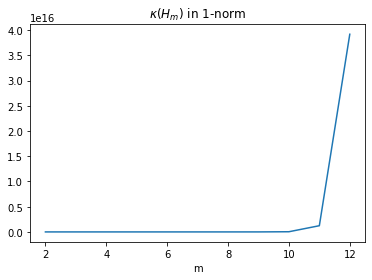

In [70]:
plt.plot(range(2,13), one_norm)
plt.xlabel('m')
plt.title(r'$\kappa(H_m)$ in 1-norm')
plt.show()

Collect all condition numbers in 2-norm of `H_m` into a list `two_norm`

In [71]:
two_norm = []
for i in range(2,13):
    d=LA.cond(hilbert_matrix(i),2)
    two_norm.append(d)

In [72]:
print('two_norm:\n', two_norm)

two_norm:
 [19.281470067903967, 524.0567775860627, 15513.738738929038, 476607.25024100044, 14951058.641453395, 475367356.9114392, 15257575566.627958, 493153404551.01215, 16025028168113.176, 522020733204514.75, 1.6211639047474996e+16]


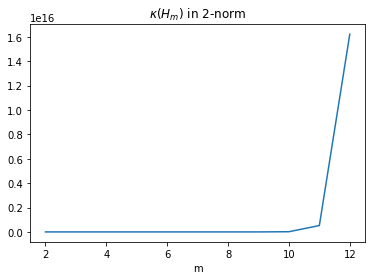

In [73]:
plt.plot(range(2,13), two_norm)
plt.xlabel('m')
plt.title(r'$\kappa(H_m)$ in 2-norm')
plt.show()

---
## Part 2 

### Now generate the $m$-vector $b_m = H_{m} x$ also, where $x$ is the $m$-vector with all of its components equal to $1$.

### Use Gaussian elimination to solve the resulting linear system $H_{m} x = b_m$ with $H_{m}$ and $b$ given above, obtaining an approximate solution $\tilde{x}$.

### Part 2.1

Construct the $m$-vector $b_m$ for $m = 2, 3, \dots, 12$. Store all 1D `np.array` $b_m$ into the list `b_m`.

In [82]:
b_m=[]
for i in range(2,13):
    b_m.append(hilbert_matrix(i) @ np.ones(i))

Print `b_m`

In [83]:
for i in range(len(b_m)):
    print('b_%d:' % (i+2))
    print(b_m[i])
    print()

b_2:
[1.5        0.83333333]

b_3:
[1.83333333 1.08333333 0.78333333]

b_4:
[2.08333333 1.28333333 0.95       0.75952381]

b_5:
[2.28333333 1.45       1.09285714 0.88452381 0.74563492]

b_6:
[2.45       1.59285714 1.21785714 0.99563492 0.84563492 0.73654401]

b_7:
[2.59285714 1.71785714 1.32896825 1.09563492 0.93654401 0.81987734
 0.73013376]

b_8:
[2.71785714 1.82896825 1.42896825 1.18654401 1.01987734 0.89680042
 0.80156233 0.72537185]

b_9:
[2.82896825 1.92896825 1.51987734 1.26987734 1.09680042 0.96822899
 0.86822899 0.78787185 0.72169538]

b_10:
[2.92896825 2.01987734 1.60321068 1.34680042 1.16822899 1.03489566
 0.93072899 0.84669538 0.77725094 0.7187714 ]

b_11:
[3.01987734 2.10321068 1.68013376 1.41822899 1.23489566 1.09739566
 0.98955252 0.90225094 0.82988251 0.7687714  0.71639045]

b_12:
[3.10321068 2.18013376 1.75156233 1.48489566 1.29739566 1.15621919
 1.04510808 0.95488251 0.87988251 0.81639045 0.761845   0.71441417]



### Part 2.2

Implement the function of __Gaussian elimination__. 

(Note that you need to implement it by hand, simply using some package functions is not allowed.)

In [155]:
def gaussian_elimination(
    A,
    b
):
    U = np.copy(A)
    m = len(A)
    x = np.zeros(m)
    new_b = np.copy(b)

    for k in range(m-1):
        L = np.diag(np.ones(m))
        for j in range(k + 1, m):
            L[j, k] = -U[j, k] / U[k, k]
            U[j, k:] = U[j, k:] + L[j, k]*U[k, k:]
            new_b[j] = new_b[j] + L[j, k]*new_b[k]

    for i in range(m):
        if i == 0:
            x[-1] = new_b[-1] / U[-1, -1]
        else:
            x[-1-i] = (new_b[-1-i] - U[-1-i, -i:]@x[-i:]) / U[-1-i, -1-i]
    
    return x

Store all approximate solutions $\tilde{x}$ of $H_m$ into a list `x_m` for $m = 2, 3, \dots, 12$

In [156]:
x_m = []
for i in range(len(H_m)):
    x = gaussian_elimination(H_m[i], b_m[i])
    x_m.append(x)

In [157]:
print(x_m)

[array([1.5, 2.5]), array([1.83333333, 3.25      , 3.91666667]), array([2.08333333, 3.85      , 4.75      , 5.31666667]), array([2.28333333, 4.35      , 5.46428571, 6.19166667, 6.71071429]), array([2.45      , 4.77857143, 6.08928571, 6.96944444, 7.61071429,
       8.10198413]), array([2.59285714, 5.15357143, 6.64484127, 7.66944444, 8.4288961 ,
       9.01865079, 9.49173882]), array([ 2.71785714,  5.48690476,  7.14484127,  8.30580808,  9.1788961 ,
        9.86480464, 10.42031025, 10.88057776]), array([ 2.82896825,  5.78690476,  7.59938672,  8.88914141,  9.8712038 ,
       10.65051893, 11.28697691, 11.81807776, 12.26882146]), array([ 2.92896825,  6.05963203,  8.01605339,  9.42760295, 10.51406094,
       11.38385226, 12.09947691, 12.7004307 , 13.2132659 , 13.65665666]), array([ 3.01987734,  6.30963203,  8.40066878,  9.92760295, 11.11406094,
       12.07135226, 12.86418279, 13.53376403, 14.10800274, 14.60665666,
       15.04419947]), array([ 3.10321068,  6.54040127,  8.75781163, 10.3942696

---
## Part 3

### Investigate the error behavior of the computed solution $\tilde x$.
### (i) Compute the $\infty$-norm of the residual $r = b-H_{m} \tilde{x}$.
### (ii) Compute the error $\delta x = \tilde{x}-x$, where $x$ is the vector of all ones. 
### (iii) How large can you take $m$ before there is no significant digits in the solution ?

### Part 3.1

Compute the $\infty$-norm of the residual $r_m = b_m-H_{m} \tilde{x}$ for $m = 2, 3, \dots, 12$. And store the values into the list `r_m`.

In [144]:
r_m = []
for i in range(11):
    r_m.append(LA.norm(b_m[i]-H_m[i] @ x_m[i],np.inf))

In [145]:
print('r_m:\n', r_m)

r_m:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Plot the figure of the $\infty$-norm of the residual for $m = 2, 3, \dots, 12$

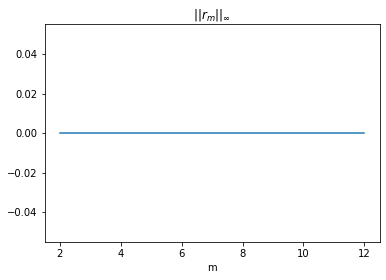

In [146]:
plt.plot(range(2,13), r_m)
plt.xlabel('m')
plt.title(r'$||r_m||_\infty$')
plt.show()

### Part 3.2

Compute the error $\delta x = \tilde{x}-x$, where $x$ is the vector of all ones. And store the values into the list `delta_x`.

In [147]:
delta_x = []
for i in range(11):
    delta_x.append(x_m[i]-np.ones(i+2))

Collect all errors $\delta x$ in 2-norm into the list `delta_x_two_norm` for $m = 2, 3, ..., 12$

In [149]:
delta_x_two_norm = []
for i in range(11):
    delta_x_two_norm.append(LA.norm(delta_x[i]))

In [150]:
print('delta_x_two_norm =', delta_x_two_norm)

delta_x_two_norm = [1.5811388300841898, 3.776756397874886, 6.480140602041148, 9.610668645524044, 13.116970687054197, 16.962663636756403, 21.120237170376615, 25.567945735181898, 30.288039270292586, 35.265671882656044, 40.488187145581975]


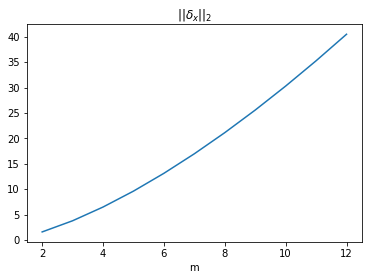

In [151]:
plt.plot(range(2,13), delta_x_two_norm)
plt.xlabel('m')
plt.title(r'$||\delta_x||_2$')
plt.show()

### Part 3.3

How large can you take  $m$  before there is no significant digits in the solution ?

> Please write down your answer here.